In [765]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [766]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay

from MA_PREDICTOR.car import get_abnormal_return, calculate_car, calculate_ar
from MA_PREDICTOR.global_vars import STOCKS, MARKET
from MA_PREDICTOR.data import add_car

In [767]:
data = pd.read_csv('../MA_PREDICTOR/data/ma_data.csv',
                   parse_dates=['announcement_date'])[['id', 'announcement_date', 'acquiror_ticker']]

# Deep dive: single observations

In [768]:
# Generating random samples
samples = [data.iloc[n] for n in np.random.randint(len(data), size=10)]

# Getting abnormal return for specified timeframe
abnormal_returns = []
for sample in samples:
    if sample.acquiror_ticker in STOCKS:
        abnormal_returns.append(calculate_ar(sample.acquiror_ticker, sample.announcement_date))
        
abnormal_returns

[Date
 2021-05-14   -0.005322
 2021-05-17    0.005110
 2021-05-18    0.007976
 Name: abnormal_return, dtype: float64,
 Date
 2010-06-07   -0.043399
 2010-06-08   -0.059095
 2010-06-09    0.036272
 Name: abnormal_return, dtype: float64]

IndexError: list index out of range

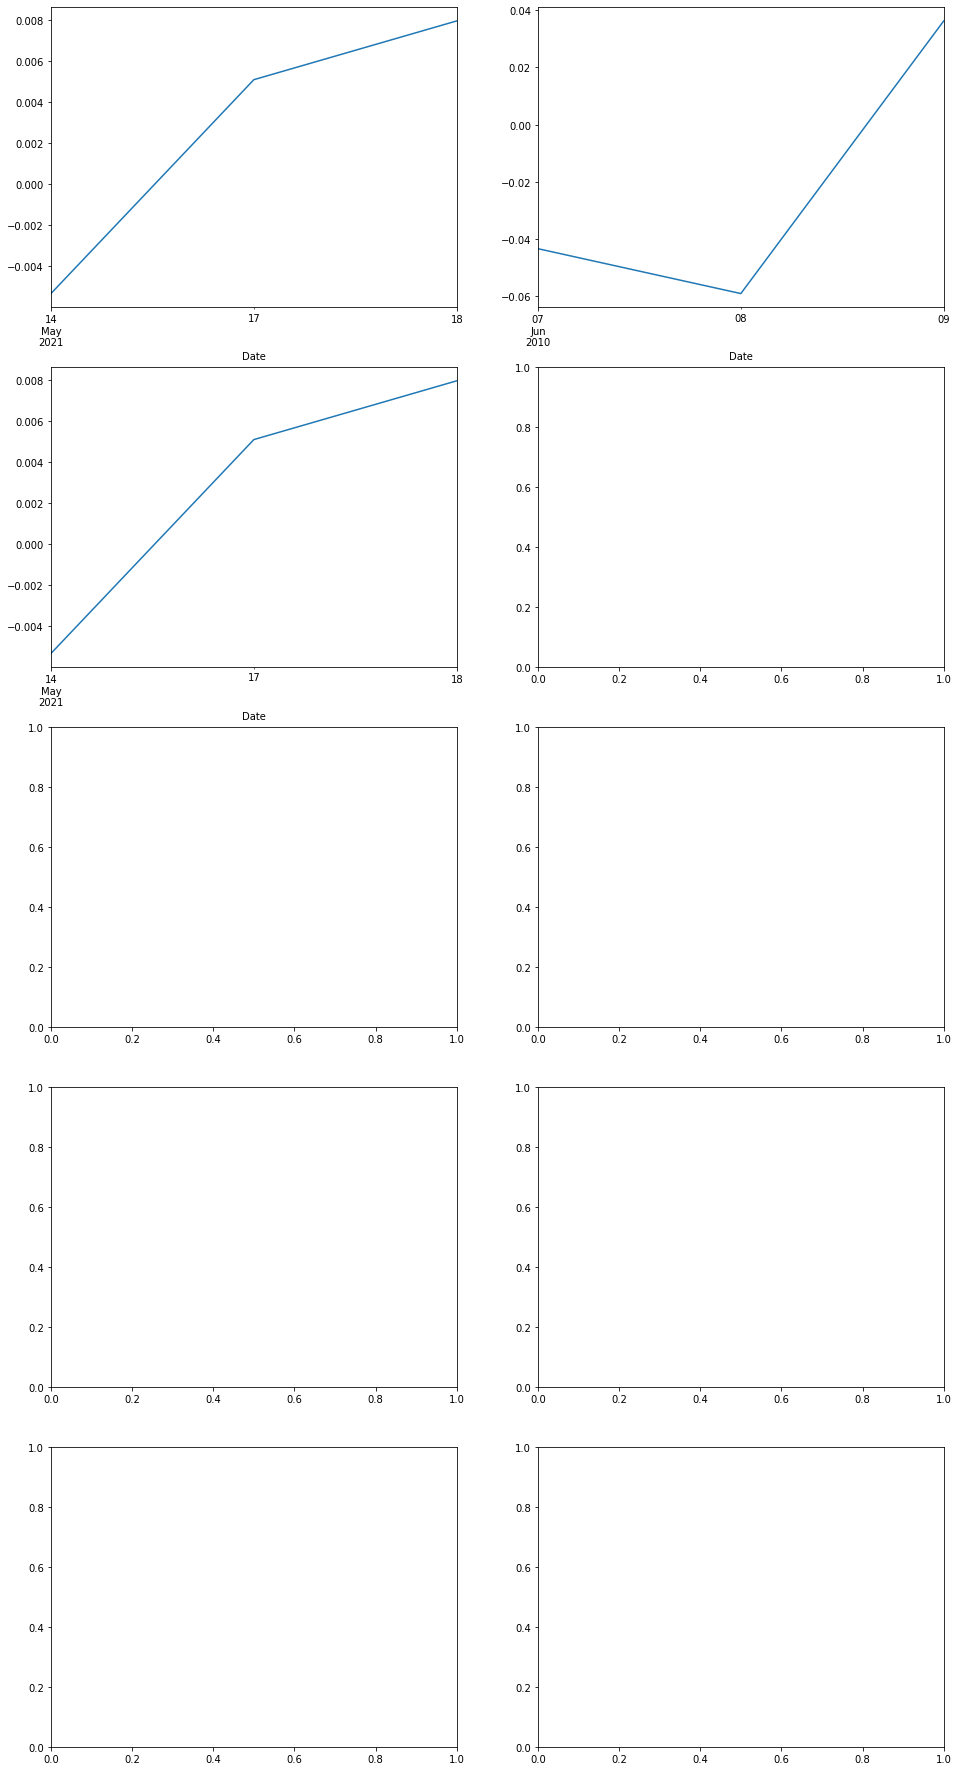

In [769]:
fig, axes = plt.subplots(5,2, figsize=(16, 32))

for x in range(5):
    for y in range(2):
        returns = abnormal_returns[x*y + y]
        returns.plot(ax=axes[x][y]);

# Dataset

In [770]:
def add_car(df):

    # if ticker not in dict put nan
    df['car'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [771]:
def add_car_3(df):

    # if ticker not in dict put nan
    df['car_3'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 3, 3)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [772]:
def add_car_5(df):

    # if ticker not in dict put nan
    df['car_5'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 5, 5)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)

In [775]:
def add_car_10(df):

    # if ticker not in dict put nan
    df['car_10'] = df.apply(
        lambda row:
            calculate_car(row.acquiror_ticker, row.announcement_date, 10, 10)
            if row.acquiror_ticker in STOCKS else np.NaN,
        axis=1)
    

In [776]:
add_car(data)

In [777]:
add_car_3(data)

In [778]:
add_car_5(data)

In [779]:
add_car_10(data)

In [780]:
data.std()

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


id                               588864651.521951
announcement_date    1692 days 23:58:49.942889696
car                                   1391.809088
car_3                                 1402.756596
car_5                                  1403.64418
car_10                                 439.789528
dtype: object

In [781]:
# Removing outliers

data = data[(data.car > -0.3) & (data.car < 0.3)]
data = data[(data.car_3 > -0.3) & (data.car_3 < 0.3)]
data = data[(data.car_5 > -0.3) & (data.car_5 < 0.3)]
data = data[(data.car_10 > -0.3) & (data.car_10 < 0.3)]

In [782]:
data.describe()

,id,car,car_3,car_5,car_10
count,1.581500e+04,15815.000000,15815.000000,15815.000000,15815.000000
mean,2.644638e+09,0.003064,0.003504,0.003969,0.005693
std,5.953733e+08,0.042765,0.052723,0.059069,0.074544
min,1.064837e+09,-0.297229,-0.298809,-0.298254,-0.299805
25%,2.157671e+09,-0.014652,-0.020009,-0.024052,-0.032082
50%,2.618916e+09,0.001424,0.002049,0.002690,0.005215
75%,3.142118e+09,0.019328,0.025520,0.030785,0.044215
max,3.794614e+09,0.274971,0.296984,0.298908,0.299557


/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/2928176065.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(list(data.std()[-4:]));


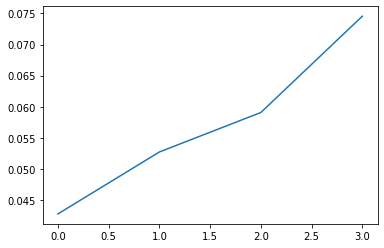

In [783]:
plt.plot(list(data.std()[-4:]));

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_16967/622446858.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(list(data.std()[-4:]));


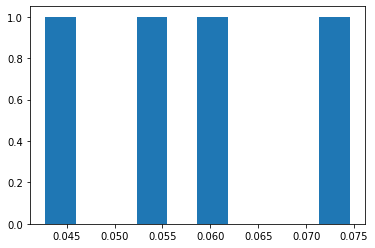

In [784]:
plt.hist(list(data.std()[-4:]));